In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [6]:
df.shape

(768, 9)

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


<AxesSubplot: >

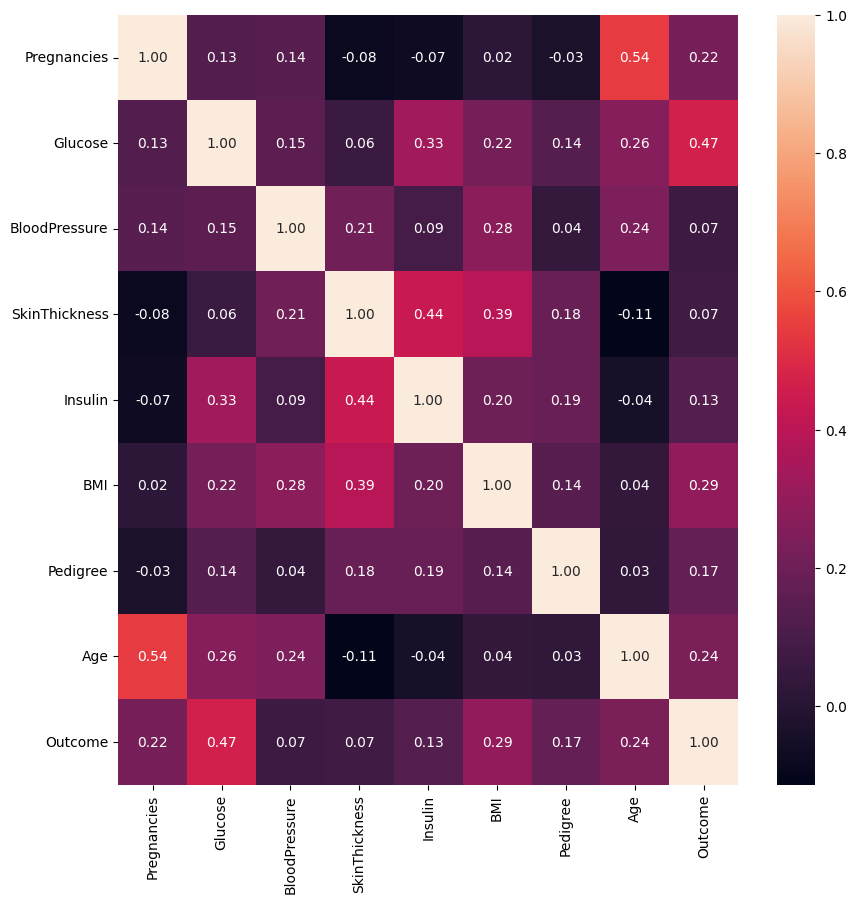

In [8]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [9]:
sns.set_style('darkgrid')

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

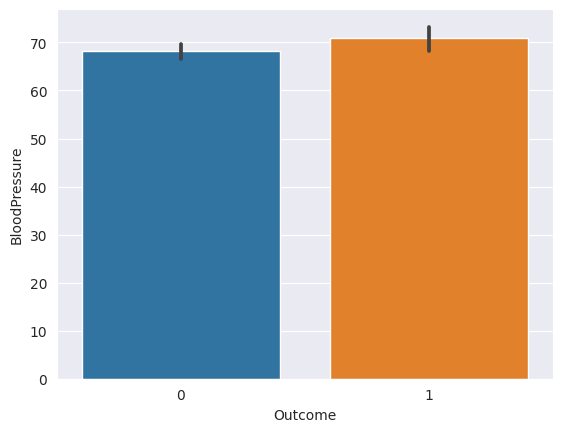

In [10]:
sns.barplot(x=df['Outcome'], y=df['BloodPressure'])

In [11]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age'],
      dtype='object')

In [12]:
X = X[['Pregnancies', 'Glucose', 'BMI', 'Age']]
X.shape

(768, 4)

In [13]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
X.describe()

,Pregnancies,Glucose,BMI,Age
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,31.992578,33.240885
std,3.369578,31.972618,7.884160,11.760232
min,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,27.300000,24.000000
50%,3.000000,117.000000,32.000000,29.000000
75%,6.000000,140.250000,36.600000,41.000000
max,17.000000,199.000000,67.100000,81.000000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[81, 18],
       [18, 37]])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
j =0
jac = 0
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    if acc>jac:
        j = i
        jac = acc
print(j,jac)

5 0.7662337662337663
